In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/Users/Masih/Desktop/bootcamp /Euro-USD-Prediction-/eur_usd_lstm_model.h5')

# Load and preprocess data
ticker = 'EURUSD=X'
data = yf.download(ticker, start='2010-01-01', end='2024-05-20')
data2 = data.copy()
data2.dropna(inplace=True)

2024-05-23 20:46:00.164405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[*********************100%%**********************]  1 of 1 completed


In [2]:
from ta import add_all_ta_features
from ta.utils import dropna

data2 = add_all_ta_features(
    data2, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True
)
data2.dropna(inplace=True)
data2['Return'] = data2['Close'].pct_change()
data2.dropna(inplace=True)

features = ['Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volatility_bbm',
            'volatility_bbh', 'volatility_bbl', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
            'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow',
            'momentum_rsi', 'momentum_stoch_rsi']

data2 = data2[features]

In [3]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data2)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [4]:
# Predict and visualize
predictions = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step


In [5]:
# Inverse transform the 'Close' predictions
close_scaler = MinMaxScaler()
close_scaler.fit(data2[['Close']])
predictions = close_scaler.inverse_transform(predictions)

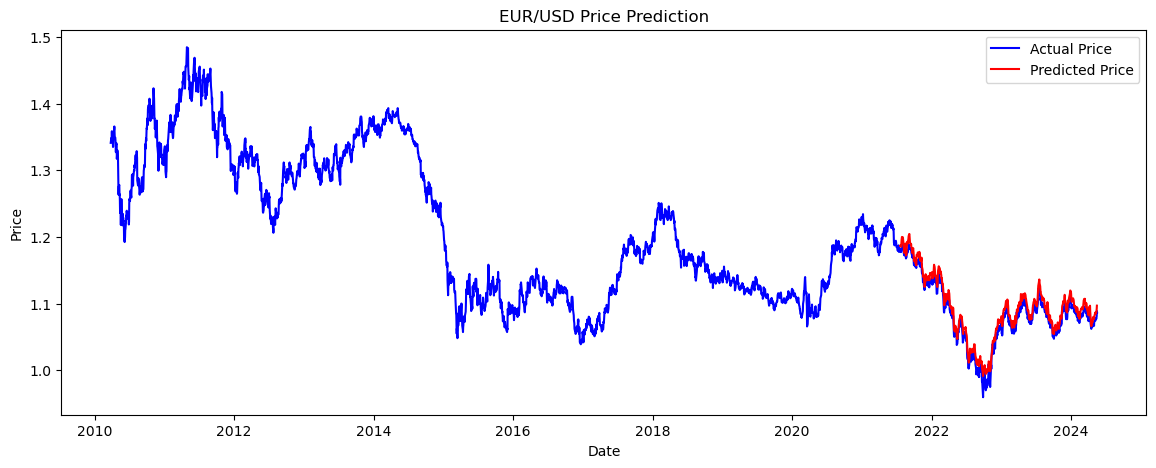

In [6]:

# Adjust indices for plotting
train_data_len = split + sequence_length
test_data_index = data.index[train_data_len:train_data_len + len(predictions)]

plt.figure(figsize=(14, 5))
plt.plot(data.index[sequence_length:], data['Close'][sequence_length:], color='blue', label='Actual Price')
plt.plot(test_data_index, predictions, color='red', label='Predicted Price')
plt.title('EUR/USD Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Predict future values until 2027
future_dates = pd.date_range(start=data.index[-1], periods=365 * 3, freq='D')  # Three years of daily data
future_predictions = []

In [8]:

# Start with the last sequence of the training data
last_sequence = data_scaled[-sequence_length:]

for _ in range(len(future_dates)):
    next_pred = model.predict(last_sequence.reshape(1, sequence_length, data_scaled.shape[1]))
    future_predictions.append(next_pred[0, 0])
    next_pred_expanded = np.zeros((1, data_scaled.shape[1]))  # Create an array of zeros with the same number of features
    next_pred_expanded[0, 0] = next_pred  # Assign the predicted close price to the correct position
    last_sequence = np.append(last_sequence[1:], next_pred_expanded, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━

In [9]:
# Inverse transform the future predictions
future_predictions = close_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

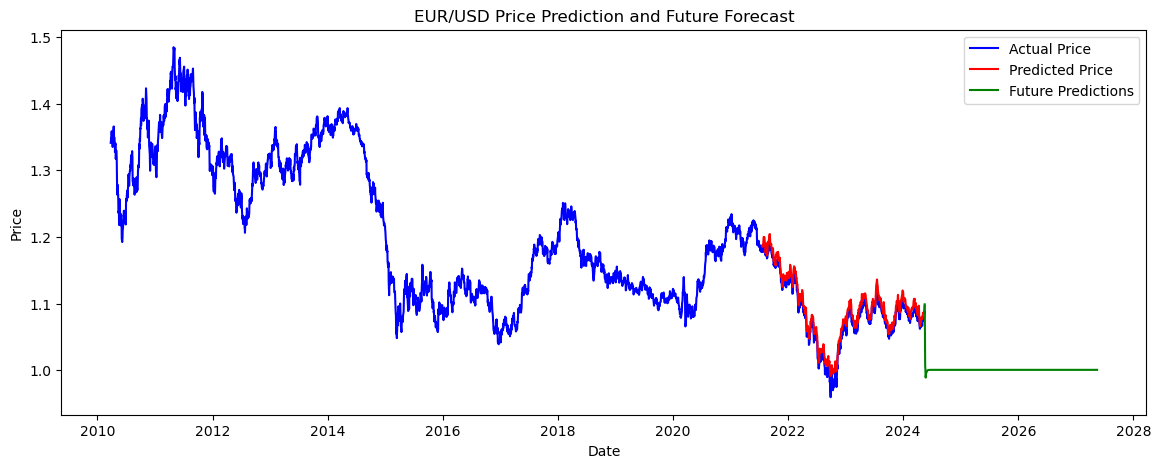

            Predicted_Close
2024-05-17         1.098932
2024-05-18         1.074026
2024-05-19         1.025360
2024-05-20         1.005866
2024-05-21         1.003285
...                     ...
2027-05-12         1.000660
2027-05-13         1.000660
2027-05-14         1.000660
2027-05-15         1.000660
2027-05-16         1.000660

[1095 rows x 1 columns]


In [11]:

# Plot historical and future predictions
plt.figure(figsize=(14, 5))
plt.plot(data.index[sequence_length:], data['Close'][sequence_length:], color='blue', label='Actual Price')
plt.plot(test_data_index, predictions, color='red', label='Predicted Price')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted_Close'], color='green', label='Future Predictions')
plt.title('EUR/USD Price Prediction and Future Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the future predictions DataFrame
print(future_predictions_df)




In [12]:
future_predictions_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])


In [14]:
future_predictions_df.head(30)

,Predicted_Close
2024-05-17,1.098932
2024-05-18,1.074026
2024-05-19,1.025360
2024-05-20,1.005866
2024-05-21,1.003285
2024-05-22,0.992506
2024-05-23,0.989092
2024-05-24,0.991692
2024-05-25,0.994144
2024-05-26,0.995535


In [18]:
import io
import pandas as pd
import base64
from IPython.display import display, HTML

# Assuming future_predictions_df is your DataFrame

# Save the DataFrame to a CSV file in memory
csv_buffer = io.StringIO()
future_predictions_df.to_csv(csv_buffer)
csv_buffer.seek(0)

# Create a download link
def create_download_link(df, title="Download CSV file", filename="future_predictions.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode()).decode()  # some strings <-> bytes conversions necessary here
    href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">{title}</a>'
    return href

# Display the download link
display(HTML(create_download_link(future_predictions_df)))


In [21]:
# Load and preprocess data
ticker = 'EURUSD=X'
data = yf.download(ticker, start='2010-01-01', end='2024-05-20')
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,1.077041,1.080731,1.076646,1.077041,1.077041,0
2024-05-14,1.079354,1.082837,1.077644,1.079354,1.079354,0
2024-05-15,1.081455,1.087429,1.081362,1.081455,1.081455,0
2024-05-16,1.088981,1.089681,1.085517,1.088981,1.088981,0
2024-05-17,1.086779,1.087891,1.083635,1.086779,1.086779,0
